In [96]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import dgl
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from dgl.nn.pytorch import SAGEConv
from graphviz import Digraph
import optuna

def create_stride_file(file_name, edge_functions):
    """
    Create and render a security threat graph using Graphviz.
    
    Args:
    - file_name (str): The name of the output file.
    - edge_functions (list): List of functions to add edges for different parts of the application.
    
    Returns:
    - nodes (dict): Dictionary of nodes with their feature vectors.
    - edges (list): List of edges with their concatenated feature vectors.
    - edge_features_dict (dict): Dictionary of edge names and their feature vectors.
    """
    dot = Digraph()
    dot.attr('node', fontname='bold', fontweight='2')
    dot.attr('edge', fontname='bold')
    dot.attr('node', fontname='bold', penwidth='2')
    dot.attr('edge', fontname='bold', penwidth='2')
    
    # Define Nodes with their attributes
    nodes = {
        'login': [0, 0, 0, 0, 0],
        'admin': [1, 1, 0, 0, 0],
        'In\n OMS Directory': [0, 0, 0, 1, 0],
        'In\n Customer DB': [0, 0, 0, 0, 1],
        'In\n Product DB': [0, 0, 0, 0, 1],
        'Disclosure\nof Sensitive\n Data': [1, 1, 1, 1, 1],
        'Render\n Malicious\n Advertisement': [0, 0, 0, 1, 1],
        'Flood Partial\n Request\n Headers': [0, 0, 1, 1, 0],
        'Website\n Unavailable': [0, 0, 0, 1, 0],
        'home': [1, 0, 0, 0, 0],
        'Manipulate\n Control\n Syntax': [1, 0, 0, 1, 1],
        'Steal\n Session\n Cookie': [1, 0, 1, 0, 0],
        'Usurp\n Access to\n IMS SMB \n Protocol': [1, 0, 1, 1, 0],
        'Target\n Unpatched\n Endpoints': [0, 0, 1, 0, 0],
        'Install\nRootKit': [0, 1, 0, 1, 0],
        'Disable\nAntivirus': [1, 1, 1, 1, 0],
        'Overwrite\nMaster Boot\nRecord': [0, 0, 0, 1, 0],
        'Flood IMS\n with Request': [0, 0, 1, 1, 0],
        'In IMS ': [1, 0, 0, 1, 0],
        'Dynamic\n Memory\n Allocation': [0, 0, 0, 1, 0],
        'Frame Pointer\n with Overwritten Memory': [0, 0, 0, 1, 0],
        'Enter\n Kernel Space': [0, 1, 0, 1, 0],
        'Access a\n Known UNC\nShare': [1, 1, 0, 1, 0],
        'Create User\n Account with\n Full Privilege': [0, 1, 0, 1, 0],
        'Search Local\n Network with\n using\nwmic.exe': [0, 1, 1, 1, 0],
        'Product\nList': [1, 0, 0, 0, 0],
        'Intercept Protocol\n Trace Response': [0, 1, 1, 1, 0],
        'Access\nOMS': [1, 1, 0, 1, 0],
        'Register a\n Rouge Domain\n Controller (DC)': [1, 1, 1, 1, 0],
        'Malicious\nEmail\nin Employee\'s Email': [1, 1, 1, 1, 0],
        'Access\n VPN\n Network': [1, 1, 1, 0, 0],
        'Stolen\n Session\n Token': [0, 1, 1, 1, 0],
        'Reuse\n SSL\n Token': [1, 1, 1, 1, 0],
        'Spoofing\n Legitimate\n User': [1, 0, 0, 0, 0],
        'Client Side\n Malicious Browser\n Extensions': [1, 0, 0, 0, 0],
        'Scrape\n Personal\n Data': [1, 1, 1, 0, 1],
        'Product\nPage': [1, 0, 0, 0, 0],
        'Comment Creation Race': [0, 0, 0, 1, 0],
        'Store Malicious \nScript in\n Database': [1, 1, 0, 0, 1],
        'Access Unwhitelisted Domains': [0, 0, 0, 1, 0],
        'Cookies sent to\n External Web\n Server': [1, 1, 0, 1, 0],
        'i.Leverage Malicious\n RDP Server\nii.An RDP Relay\niii. Weaponized RDP\n Connection File': [1, 0, 1, 1, 0],
        'In\n Supplier\nDesktop': [1, 1, 0, 0, 0],
        'Access System\nFiles and Binaries': [0, 1, 0, 0, 0],
        'Connect Foreign\n Network Devices': [1, 1, 0, 0, 0],
        'Dwmcore.dll': [0, 1, 0, 1, 0],
        'Replicate \nBrowser \nSession': [1, 1, 1, 0, 0],
        'Heap-Based\n Buffer Overflow': [1, 1, 0, 1, 0],
        'Log\n Tampering': [0, 1, 1, 1, 1],
        'User\nImpersonation': [1, 1, 0, 1, 1],
        'Lack of \n Accountability': [0, 0, 0, 0, 0],
        'Cart List': [1, 0, 0, 0, 0],
        'Manipulate DOM Tree': [0, 0, 0, 1, 0],
        'Modify Cart Transactions': [0, 0, 0, 1, 0],
        'Unencrypted Cookies': [0, 0, 0, 1, 0],
        'MiTM Attack': [0, 0, 0, 1, 0],
        'Order Confirmation': [0, 0, 0, 1, 0],
        'Order Out of Inventory': [0, 0, 0, 1, 0],
        'Rouge alert() Dialogue': [0, 0, 0, 1, 0],
        'Access Customer Database': [0, 0, 0, 1, 1],
        'Steal Payment Methods':[0, 0, 0, 1, 1],
        'Inject Scripts to Capture Keystrokes':[0, 0, 0, 1, 1]
    }

    for node, attrs in nodes.items(): # Iterates over nodes dictionary (nodes) to extract node name and attributes
        dot.node(node, f'{node}\n{attrs}') # Creates Nodes in the graph with name and attributes

    edges = [] # Initialized empty array
    edge_features_dict = {} # Initialized empty dictionary

    # Define edges based on functions    
    for edge_function in edge_functions:
        edge_function(dot, edges, nodes, edge_features_dict)

    return nodes, edges, edge_features_dict

# Define edge creation functions
def Login(dot, edges, nodes, edge_features_dict):
    edge_list = [
        ('login', 'admin', 'No Restriction of \nExcessive Authentication\n Attempts'),
        ('login', 'Flood Partial\n Request\n Headers', 'Multiple Connections\n to Target Server'),
        ('Flood Partial\n Request\n Headers', 'Website\n Unavailable', 'Unable to Release \nOpen Partial Connections'),
        ('admin', 'In\n OMS Directory', 'Fail To Sanitize\n Incoming Paths'),
        ('admin', 'In\n Customer DB', 'Improper Interaction\n Frequency'),
        ('admin', 'In\n Product DB', 'Password Aging with\n Long Expiration'),
        ('In\n OMS Directory', 'Disclosure\nof Sensitive\n Data', 'Exposure of \nSensitive Information'),
        ('In\n Customer DB', 'Disclosure\nof Sensitive\n Data', 'SQL Injection'),
        ('In\n Product DB', 'Render\n Malicious\n Advertisement', 'Stored\n Cross-Site-Scripting'),
        ('Render\n Malicious\n Advertisement', 'Disclosure\nof Sensitive\n Data', 'Exposure of\n Sensitive Information')
    ]
    for source, target, label in edge_list:
        feature_vector = nodes[source] + nodes[target]
        edge_name = f'{label}'
        edge_features_dict[edge_name] = feature_vector
        edges.append((source, target, label))
        # dot.edge(source, target, label=f'{label}\n{feature_vector}')

def Home(dot, edges, nodes, edge_features_dict):
    edge_list = [
        ('login', 'home', ''),
        ('home', 'Manipulate\n Control\n Syntax', 'Improper\n Encoding'),
        ('home', 'Steal\n Session\n Cookie', 'Incorrect Permission\n for Critical Resource'),
        ('Manipulate\n Control\n Syntax', 'Usurp\n Access to\n IMS SMB \n Protocol', 'Misuse\n Directives'),
        ('Usurp\n Access to\n IMS SMB \n Protocol', 'Disclosure\nof Sensitive\n Data', 'Exposure of Resource\n to Wrong Sphere'),
        ('Usurp\n Access to\n IMS SMB \n Protocol', 'Target\n Unpatched\n Endpoints', 'Enumerated\n Connected\n Endpoints\n (Scan TCP Port 445)'),
        ('Target\n Unpatched\n Endpoints', 'Install\nRootKit', 'Exploit Outdated\n Software'),
        ('Install\nRootKit', 'Overwrite\nMaster Boot\nRecord', 'Persistence and\n System Control'),
        ('Steal\n Session\n Cookie', 'Disclosure\nof Sensitive\n Data', 'Insecure\n Cookies'),
        ('home', 'Flood IMS\n with Request', 'Use of Resources\n without Throttling'),
        ('Flood IMS\n with Request', 'Website\n Unavailable', 'Uncontrollable Resource\n Consumption'),
        ('home', 'In IMS ', 'Server Side\n Include Injection'),
        ('In IMS ', 'Dynamic\n Memory\n Allocation', 'Uncontrolled Resource\n Consumption'),
        ('Dynamic\n Memory\n Allocation', 'Frame Pointer\n with Overwritten Memory', 'Classic Buffer\n Overflow'),
        ('In IMS ', 'Access a\n Known UNC\nShare', 'Absolute Path\n Traversal'),
        ('Access a\n Known UNC\nShare', 'Create User\n Account with\n Full Privilege', 'Exploit MS15-011\n Vulnerability'),
        ('Create User\n Account with\n Full Privilege', 'Search Local\n Network with\n using\nwmic.exe', 'Perform Network\n Reconnaissance'),
        ('Search Local\n Network with\n using\nwmic.exe', 'Target\n Unpatched\n Endpoints', 'Analyze Software\n Versions'),
        ('Install\nRootKit', 'Disable\nAntivirus', 'Defense Evasion'),
        ('Frame Pointer\n with Overwritten Memory','Enter\n Kernel Space','Untrusted Pointer\n dereference '),
    ]
    for source, target, label in edge_list:
        feature_vector = nodes[source] + nodes[target]
        edge_name = f'{label}'
        edge_features_dict[edge_name] = feature_vector
        edges.append((source, target, label))
        # dot.edge(source, target, label=f'{label}\n{feature_vector}')

def ProductList(dot, edges, nodes, edge_features_dict):
    edge_list = [
        ('home', 'Product\nList', ''),
        ('Product\nList', 'Intercept Protocol\n Trace Response', 'Enabled Protocol\n Trace Method'),
        ('Product\nList', 'Access\nOMS', 'Unmaintained \nThird Party\n Components'),
        ('Access\nOMS', 'Register a\n Rouge Domain\n Controller (DC)', 'DCShadow\n Technique'),
        ('Register a\n Rouge Domain\n Controller (DC)', 'Create User\n Account with\n Full Privilege', 'Mimic Domain\n Controller'),
        ('Register a\n Rouge Domain\n Controller (DC)', 'Malicious\nEmail\nin Employee\'s Email', 'Usurp Internal\n Email Accounts'),
        ('Malicious\nEmail\nin Employee\'s Email', 'Access\n VPN\n Network', 'Exposed\n Credentials'),
        ('Access\nOMS', 'Stolen\n Session\n Token', 'Poorly Protected\n Identity Token'),
        ('Stolen\n Session\n Token', 'Reuse\n SSL\n Token', 'Session Resumption\n Techniques'),
        ('Reuse\n SSL\n Token', 'Spoofing\n Legitimate\n User', 'Reuse Valid\n Session ID'),
        ('Client Side\n Malicious Browser\n Extensions', 'Stolen\n Session\n Token', 'Misuse HTTP\n Header'),
        ('Client Side\n Malicious Browser\n Extensions', 'Scrape\n Personal\n Data', 'Missing Encryption\n of Sensitive Data'),
        ('Scrape\n Personal\n Data', 'Spoofing\n Legitimate\n User', 'Clear Text Transmission\n of Sensitive Data'),
        ('Access\n VPN\n Network', 'Spoofing\n Legitimate\n User', 'Broad Access\n to Sensitive Networks')
    ]
    for source, target, label in edge_list:
        feature_vector = nodes[source] + nodes[target]
        edge_name = f'{label}'
        edge_features_dict[edge_name] = feature_vector
        edges.append((source, target, label))
        # dot.edge(source, target, label=f'{label}\n{feature_vector}')

def ProductPage(dot, edges, nodes, edge_features_dict):
    edge_list = [
        ('Product\nList', 'Product\nPage', ''),
        ('Product\nPage','Comment Creation Race', "Multiple Comment\n Creation Requests"),
        ('Product\nPage','i.Leverage Malicious\n RDP Server\nii.An RDP Relay\niii. Weaponized RDP\n Connection File', "Rogue RDP"),
        ('i.Leverage Malicious\n RDP Server\nii.An RDP Relay\niii. Weaponized RDP\n Connection File', 'Access System\nFiles and Binaries', 'Server Misconfiguration\n Allows RDP Access'),
        ('Access System\nFiles and Binaries', 'In\n Supplier\nDesktop', 'Unrestricted File\n Access'),
        ('In\n Supplier\nDesktop', 'Connect Foreign\n Network Devices', 'Lack of Control\n on Peripheral Devices'),
        ('Connect Foreign\n Network Devices', 'Lack of \n Accountability', 'Unpatched\n Windows OS'),
        ('In\n Supplier\nDesktop', 'Dwmcore.dll', 'Target OS File\n Vulnerability'),
        ('Dwmcore.dll','Heap-Based\n Buffer Overflow', 'Boundary Error'),
        ('Heap-Based\n Buffer Overflow', 'Log\n Tampering', 'Modify or\n Delete Logs'),
        ('Log\n Tampering', 'Lack of \n Accountability', 'Avoid Detection'),
        ('Product\nPage', 'Store Malicious \nScript in\n Database', 'Stored\n XSS'),
        ('Store Malicious \nScript in\n Database', 'Cookies sent to\n External Web\n Server', 'Client-Side\nExploitation'),
        ('Cookies sent to\n External Web\n Server', 'Replicate \nBrowser \nSession', 'Session Management\nVulnerability'),
        ('Replicate \nBrowser \nSession', 'User\nImpersonation', 'Reuse Valid\n Session ID'),
        ('User\nImpersonation', 'Lack of \n Accountability', 'Avoid Detection'),
        ('Store Malicious \nScript in\n Database','Access Unwhitelisted Domains', 'Missing Restriction\non Target URL')
    ]
    for source, target, label in edge_list:
        feature_vector = nodes[source] + nodes[target]
        edge_name = f'{label}'
        edge_features_dict[edge_name] = feature_vector
        edges.append((source, target, label))
        # dot.edge(source, target, label=f'{label}\n{feature_vector}')

def CartList(dot, edges, nodes, edge_features_dict):
    edge_list = [
        ('Product\nPage','Cart List', ''),
        ('Cart List', 'Manipulate DOM Tree', 'XSS\n Vulnerability'),
        ('Manipulate DOM Tree','Modify Cart Transactions', 'Script Injection\n through DOM'),
        ('Cart List','Unencrypted Cookies', 'No Hash\n Check'),
        ('Unencrypted Cookies','MiTM Attack', 'Cookies sent\n over Browser'),
        ('MiTM Attack','Modify Cart Transactions', 'Unencrypted\n Communication')
    ]
    for source, target, label in edge_list:
        feature_vector = nodes[source] + nodes[target]
        edge_name = f'{label}'
        edge_features_dict[edge_name] = feature_vector
        edges.append((source, target, label))
        # dot.edge(source, target, label=f'{label}\n{feature_vector}')

def OrderConfirmation(dot, edges, nodes, edge_features_dict):
    edge_list = [
        ('Cart List','Order Confirmation', ''),
        ('Order Confirmation','Order Out of Inventory', 'Simultaneous Purchase\n Actions'),
        ('Order Confirmation','Rouge alert() Dialogue', 'Lack of User Input\n Validation'),
        ('Rouge alert() Dialogue','Inject Scripts to Capture Keystrokes', 'Found XSS\n Vulnerability'),
        ('Inject Scripts to Capture Keystrokes','Steal Payment Methods', 'Poor Data\n Protection'),
        ('Order Confirmation','Access Customer Database', 'Network Access to\n Order Confirmation\n page'),
        ('Access Customer Database','Steal Payment Methods', 'Insecure\n Storage of\n Credentials')
    ]
    for source, target, label in edge_list:
        feature_vector = nodes[source] + nodes[target]
        edge_name = f'{label}'
        edge_features_dict[edge_name] = feature_vector
        edges.append((source, target, label))
        # dot.edge(source, target, label=f'{label}\n{feature_vector}')

# Create the attack graph and extract nodes and edges
dot = Digraph()
nodes, edges, edge_features_dict = create_stride_file('AttackGraph', [Login, Home, ProductList, ProductPage, CartList, OrderConfirmation])

# Render the graph to a PNG file
dot.attr(size='20,20')  # Set the size of the output image
for node, attrs in nodes.items():
    dot.node(node, f'{node}\n{attrs}')

for edge in edges:
    dot.edge(*edge)

# Save the graph
dot.render('AttackGraph', format='png')


'AttackGraph.png'

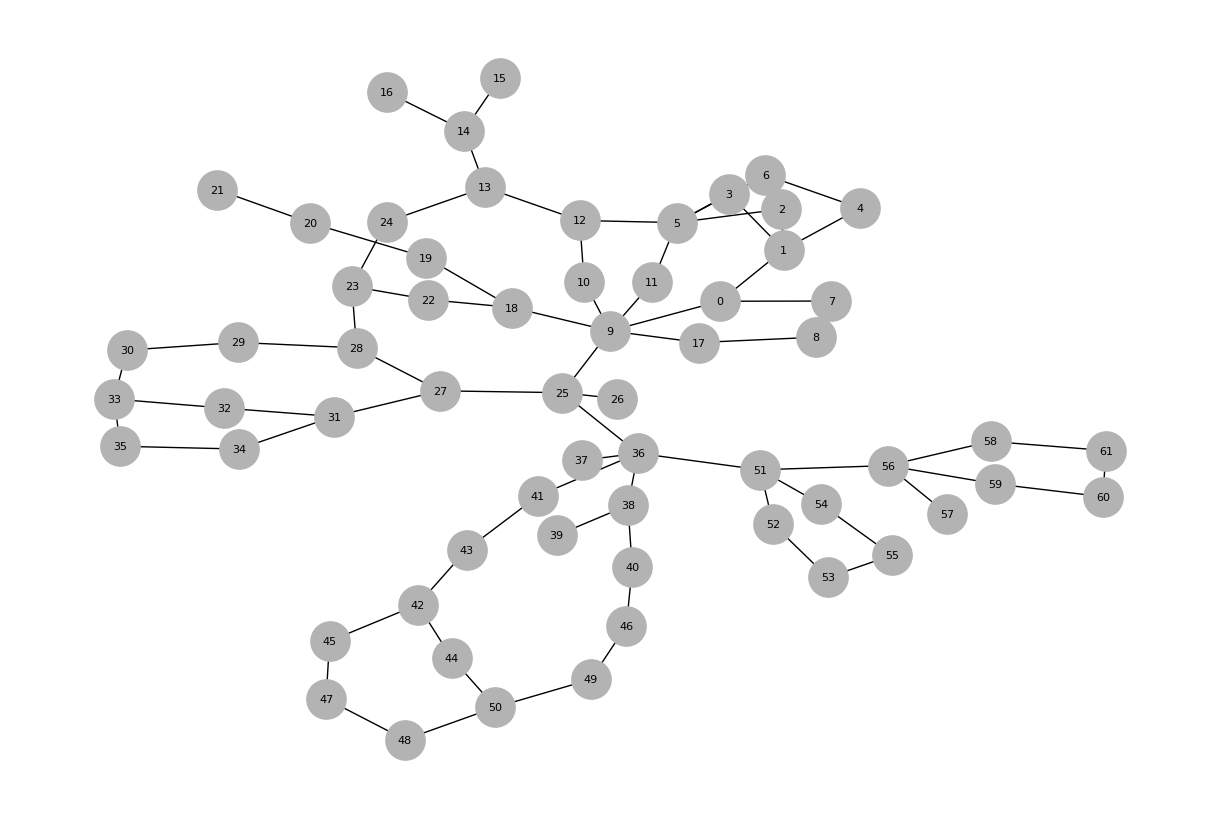

In [97]:

# Function to create DGL graph and add nodes and edges
def create_dgl_graph(nodes, edges):
    g = dgl.graph(([], []))  # Initialize an empty DGL graph
    g.add_nodes(len(nodes))  # Add nodes to the graph

   # Add edges to the graph
    edge_index = [(list(nodes.keys()).index(src), list(nodes.keys()).index(dst)) for src, dst, _ in edges]
    src, dst = zip(*edge_index)
    g.add_edges(src, dst)

   # Add node features
    node_features = torch.tensor(list(nodes.values()), dtype=torch.float32)
    g.ndata['feat'] = node_features

   # Add edge features
    edge_features = torch.tensor([nodes[src] + nodes[dst] for src, dst, _ in edges], dtype=torch.float32)
    g.edata['feat'] = edge_features

    return g

g = create_dgl_graph(nodes, edges)                   # Visualize the graph
nx_g = g.to_networkx().to_undirected()

# Compute the Kamada-Kawai layout with precomputed distances
pos = nx.kamada_kawai_layout(nx_g)

plt.figure(figsize=(12, 8))
nx.draw(nx_g, pos, with_labels=True, node_color=[[0.7, 0.7, 0.7]], font_size=8,node_size=800)
plt.show()


In [98]:

import random

def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

# Set the seed
seed = 42
set_seed(seed)



In [99]:
# Define the GraphSAGE model with concatenation method for edge scores
class GraphSAGE(nn.Module):
    def __init__(self, in_feats, h_feats, out_feats, dropout=0.3):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats, 'mean')
        self.conv2 = SAGEConv(h_feats, h_feats, 'mean')
        self.fc = nn.Linear(2 * h_feats, out_feats)
        # self.dropout = nn.Dropout(dropout)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        # h = self.dropout(h) 
        h = self.conv2(g, h)
        h = F.relu(h)
        return h

    def compute_edge_scores(self, edge_index, h):
        src_emb = h[edge_index[:, 0]]
        dst_emb = h[edge_index[:, 1]]
        edge_features = torch.cat([src_emb, dst_emb], dim=1)
        edge_scores = self.fc(edge_features)
        return edge_scores.squeeze()


In [100]:

# Positive edge examples for training and evaluation
u, v = g.edges()
positive_edges = torch.stack([u, v], dim=1)


# Define infeasible edges manually in the array, to create an array containing tuple of infeasible edge. 
infeasible_edges = [
    ('login', 'Overwrite\nMaster Boot\nRecord'),
    ('Lack of \n Accountability', 'User\nImpersonation'),
    ('Disclosure\nof Sensitive\n Data', 'In\n Product DB'),
    ('Disclosure\nof Sensitive\n Data', 'In\n Customer DB'),
    ('Disclosure\nof Sensitive\n Data', 'In IMS '),
    ('Lack of \n Accountability', 'In\n Customer DB'),
    ('Lack of \n Accountability', 'In\n Product DB'),
    ('login', 'Install\nRootKit'),
    ('login', 'Target\n Unpatched\n Endpoints'),
    ('home', 'Register a\n Rouge Domain\n Controller (DC)'),
    ('home', 'i.Leverage Malicious\n RDP Server\nii.An RDP Relay\niii. Weaponized RDP\n Connection File'),
    ('Product\nList', 'Install\nRootKit'),
    ('Product\nList', 'Target\n Unpatched\n Endpoints'),
    ('Product\nPage', 'Overwrite\nMaster Boot\nRecord'),
    ('Product\nPage', 'Disable\nAntivirus'),
    ('Cart List', 'Disclosure\nof Sensitive\n Data'),
    ('Cart List', 'Render\n Malicious\n Advertisement'),
    ('Order Confirmation', 'Create User\n Account with\n Full Privilege'),
    ('Order Confirmation', 'Search Local\n Network with\n using\nwmic.exe'),
    ('login', 'Dynamic\n Memory\n Allocation'),
    ('login', 'Search Local\n Network with\n using\nwmic.exe'),
    ('login', 'Create User\n Account with\n Full Privilege'),
    ('admin', 'Disable\nAntivirus'),
    ('admin', 'Dynamic\n Memory\n Allocation'),
    ('home', 'Install\nRootKit'),
    ('home', 'Overwrite\nMaster Boot\nRecord'),
    ('Product\nList', 'Disable\nAntivirus'),
    ('Product\nList', 'Flood IMS\n with Request'),
    ('Product\nPage', 'Disable\nAntivirus'),
    ('Product\nPage', 'Install\nRootKit'),
    ('Cart List', 'Install\nRootKit'),
    ('Cart List', 'Dynamic\n Memory\n Allocation'),
    ('Order Confirmation', 'Dynamic\n Memory\n Allocation'),
    ('Order Confirmation', 'Install\nRootKit'),
    ('login', 'Replicate \nBrowser \nSession'),
    ('admin', 'Replicate \nBrowser \nSession'),
    ('home', 'Replicate \nBrowser \nSession'),
    ('Product\nList', 'Replicate \nBrowser \nSession'),
    ('Product\nPage', 'Replicate \nBrowser \nSession'),
    ('Cart List', 'Replicate \nBrowser \nSession'),
    ('Order Confirmation', 'Replicate \nBrowser \nSession'),
    ('login', 'Scrape\n Personal\n Data'),
    ('admin', 'Scrape\n Personal\n Data'),
    ('home', 'Scrape\n Personal\n Data'),
    ('Product\nList', 'Scrape\n Personal\n Data'),
    ('Product\nPage', 'Scrape\n Personal\n Data'),
    ('Cart List', 'Scrape\n Personal\n Data'),
    ('Order Confirmation', 'Scrape\n Personal\n Data'),
    ('login', 'User\nImpersonation'),
    ('admin', 'User\nImpersonation'),
    ('home', 'User\nImpersonation'),
    ('Product\nList', 'User\nImpersonation'),
    ('Product\nPage', 'User\nImpersonation'),
    ('Cart List', 'User\nImpersonation'),
    ('Order Confirmation', 'User\nImpersonation'),
    ('login', 'Manipulate DOM Tree'),
    ('admin', 'Manipulate DOM Tree'),
    ('home', 'Manipulate DOM Tree'),
    ('Product\nList', 'Manipulate DOM Tree'),
    ('Product\nPage', 'Manipulate DOM Tree'),
    ('Cart List', 'Manipulate DOM Tree'),
    ('Order Confirmation', 'Manipulate DOM Tree'),
    ('login', 'Modify Cart Transactions'),
    ('admin', 'Modify Cart Transactions'),
    ('home', 'Modify Cart Transactions'),
    ('Product\nList', 'Modify Cart Transactions'),
    
#     # Add more infeasible edges as needed
     ('home', 'In\n Supplier\nDesktop'),
    ('home', 'Heap-Based\n Buffer Overflow'),
    ('home', 'Replicate \nBrowser \nSession'),
    ('Product\nList', 'Replicate \nBrowser \nSession'),
    ('Product\nList', 'Disable\nAntivirus'),
    ('Product\nList', 'Log\n Tampering'),
 ('Cart List', 'Replicate \nBrowser \nSession'),
    ('Order Confirmation', 'Disable\nAntivirus'),
]

# Convert infeasible edges to indices
infeasible_edges_indices = [(list(nodes.keys()).index(src), list(nodes.keys()).index(dst)) for src, dst in infeasible_edges]
infeasible_edges_tensor = torch.tensor(infeasible_edges_indices, dtype=torch.long)
def print_graph_info(nodes, edges, infeasible_edges):
    total_nodes = len(nodes)
    positive_edges = len(edges)
    negative_edges = len(infeasible_edges)
    
    print(f"Total Nodes: {total_nodes}")
    print(f"Total Positive Edges: {positive_edges}")
    print(f"Total Negative Edges: {negative_edges}")

print_graph_info(nodes,edges,infeasible_edges)



Total Nodes: 62
Total Positive Edges: 74
Total Negative Edges: 74


In [101]:
# Prepare the DataFrame to visualize training data
def prepare_dataframe(positive_edges, infeasible_edges_tensor):
    data = []
    for edge_type, edges in [("positive", positive_edges), ("negative", infeasible_edges_tensor)]:
        for edge in edges:
            src_node, dst_node = edge
            src_feature = nodes[list(nodes.keys())[src_node]]
            dst_feature = nodes[list(nodes.keys())[dst_node]]
            edge_feature = src_feature + dst_feature
            data.append({
                "src_node": list(nodes.keys())[src_node],
                "dst_node": list(nodes.keys())[dst_node],
                "src_node_feature": src_feature,
                "dst_node_feature": dst_feature,
                "edge_feature": edge_feature,
                "edge_index": (src_node, dst_node),
                "label": 1 if edge_type == "positive" else 0
            })
    return pd.DataFrame(data)

df = prepare_dataframe(positive_edges, infeasible_edges_tensor)
print("Training data:")
df



Training data:


,src_node,dst_node,src_node_feature,dst_node_feature,edge_feature,edge_index,label
0,login,admin,"[0, 0, 0, 0, 0]","[1, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 1, 0, 0, 0]","(tensor(0), tensor(1))",1
1,login,Flood Partial\n Request\n Headers,"[0, 0, 0, 0, 0]","[0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","(tensor(0), tensor(7))",1
2,Flood Partial\n Request\n Headers,Website\n Unavailable,"[0, 0, 1, 1, 0]","[0, 0, 0, 1, 0]","[0, 0, 1, 1, 0, 0, 0, 0, 1, 0]","(tensor(7), tensor(8))",1
3,admin,In\n OMS Directory,"[1, 1, 0, 0, 0]","[0, 0, 0, 1, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 1, 0]","(tensor(1), tensor(2))",1
4,admin,In\n Customer DB,"[1, 1, 0, 0, 0]","[0, 0, 0, 0, 1]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 1]","(tensor(1), tensor(3))",1
...,...,...,...,...,...,...,...
143,Product\nList,Replicate \nBrowser \nSession,"[1, 0, 0, 0, 0]","[1, 1, 1, 0, 0]","[1, 0, 0, 0, 0, 1, 1, 1, 0, 0]","(tensor(25), tensor(46))",0
144,Product\nList,Disable\nAntivirus,"[1, 0, 0, 0, 0]","[1, 1, 1, 1, 0]","[1, 0, 0, 0, 0, 1, 1, 1, 1, 0]","(tensor(25), tensor(15))",0
145,Product\nList,Log\n Tampering,"[1, 0, 0, 0, 0]","[0, 1, 1, 1, 1]","[1, 0, 0, 0, 0, 0, 1, 1, 1, 1]","(tensor(25), tensor(48))",0
146,Cart List,Replicate \nBrowser \nSession,"[1, 0, 0, 0, 0]","[1, 1, 1, 0, 0]","[1, 0, 0, 0, 0, 1, 1, 1, 0, 0]","(tensor(51), tensor(46))",0


In [102]:

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Prepare edge tensors for training and testing
train_edges = torch.tensor([edge["edge_index"] for _, edge in train_df.iterrows()])
train_labels = torch.tensor([edge["label"] for _, edge in train_df.iterrows()])

test_edges = torch.tensor([edge["edge_index"] for _, edge in test_df.iterrows()])
test_labels = torch.tensor([edge["label"] for _, edge in test_df.iterrows()])


In [103]:
# def objective(trial):
#     # Hyperparameters to tune
#     h_feats = trial.suggest_int('h_feats', 32, 128)
#     lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)
#     weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-2)

#     model = GraphSAGE(in_feats=5, h_feats=h_feats, out_feats=1)
#     opt = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
#     scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=10, gamma=0.1)

#     best_val_loss = float('inf')

#     for epoch in range(100):
#         model.train()
#         h = model(g, g.ndata['feat'])

#         scores = model.compute_edge_scores(train_edges, h)
#         loss = F.binary_cross_entropy_with_logits(scores, train_labels.float())

#         opt.zero_grad()
#         loss.backward()
#         opt.step()
#         scheduler.step()

#         model.eval()
#         with torch.no_grad():
#             h_val = model(g, g.ndata['feat'])
#             val_scores = model.compute_edge_scores(test_edges, h_val)
#             val_loss = F.binary_cross_entropy_with_logits(val_scores, test_labels.float())

#         if val_loss < best_val_loss:
#             best_val_loss = val_loss

#         print(f'Epoch {epoch:03d} | Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}')

#     return best_val_loss

# # Create an Optuna study and optimize the objective function
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=50)

# print('Best hyperparameters: ', study.best_params)


{'h_feats': 91, 'lr': 0.009719317460595523, 'weight_decay': 1.0790859898574719e-06}

In [104]:
# Best hyperparameters found by Optuna
h_feats = 91 # study.best_params['h_feats']
lr = 0.0095
weight_decay = 0.00000107

# Define the model with the best hyperparameters
model = GraphSAGE(in_feats=5, h_feats=h_feats, out_feats=1)
opt = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=10, gamma=0.1)

# Training loop with best hyperparameters
for epoch in range(100):
    model.train()
    h = model(g, g.ndata['feat'])

    scores = model.compute_edge_scores(train_edges, h)
    loss = F.binary_cross_entropy_with_logits(scores, train_labels.float())

    opt.zero_grad()
    loss.backward()
    opt.step()
    scheduler.step()

    print(f'Epoch {epoch:03d} | Loss: {loss.item():.4f}')


Epoch 000 | Loss: 0.7144
Epoch 001 | Loss: 0.6488
Epoch 002 | Loss: 0.5889
Epoch 003 | Loss: 0.5418
Epoch 004 | Loss: 0.4897
Epoch 005 | Loss: 0.4549
Epoch 006 | Loss: 0.4203
Epoch 007 | Loss: 0.3995
Epoch 008 | Loss: 0.3749
Epoch 009 | Loss: 0.3548
Epoch 010 | Loss: 0.3321
Epoch 011 | Loss: 0.3297
Epoch 012 | Loss: 0.3271


Epoch 013 | Loss: 0.3244
Epoch 014 | Loss: 0.3218
Epoch 015 | Loss: 0.3192
Epoch 016 | Loss: 0.3165
Epoch 017 | Loss: 0.3138
Epoch 018 | Loss: 0.3109
Epoch 019 | Loss: 0.3081
Epoch 020 | Loss: 0.3053
Epoch 021 | Loss: 0.3050
Epoch 022 | Loss: 0.3047
Epoch 023 | Loss: 0.3045
Epoch 024 | Loss: 0.3042
Epoch 025 | Loss: 0.3039
Epoch 026 | Loss: 0.3036
Epoch 027 | Loss: 0.3033
Epoch 028 | Loss: 0.3030
Epoch 029 | Loss: 0.3027
Epoch 030 | Loss: 0.3024
Epoch 031 | Loss: 0.3023
Epoch 032 | Loss: 0.3023
Epoch 033 | Loss: 0.3023
Epoch 034 | Loss: 0.3023
Epoch 035 | Loss: 0.3022
Epoch 036 | Loss: 0.3022
Epoch 037 | Loss: 0.3022
Epoch 038 | Loss: 0.3021
Epoch 039 | Loss: 0.3021
Epoch 040 | Loss: 0.3021
Epoch 041 | Loss: 0.3021
Epoch 042 | Loss: 0.3021
Epoch 043 | Loss: 0.3021
Epoch 044 | Loss: 0.3021
Epoch 045 | Loss: 0.3021
Epoch 046 | Loss: 0.3020
Epoch 047 | Loss: 0.3020
Epoch 048 | Loss: 0.3020
Epoch 049 | Loss: 0.3020
Epoch 050 | Loss: 0.3020
Epoch 051 | Loss: 0.3020
Epoch 052 | Loss: 0.3020


In [105]:

# Function to find possible vulnerabilities based on edge features
def get_possible_vulnerabilities(edge_features, edge_features_dict):
    vulnerabilities = []
    for edge_name, features in edge_features_dict.items():
        if np.array_equal(features, edge_features):
            vulnerabilities.append(edge_name)
    if not vulnerabilities:
        return 'No known vulnerability'
    return ', '.join(vulnerabilities)   



In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.metrics import confusion_matrix

# Evaluation
model.eval()
with torch.no_grad():
    h = model(g, g.ndata['feat'])
    scores = torch.sigmoid(model.compute_edge_scores(test_edges, h))  # Apply sigmoid to get probabilities
    predictions = scores > 0.5
    
    # Compute metrics
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions)
    recall = recall_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)
    auc_roc = roc_auc_score(test_labels, scores)
    
    # Compute confusion matrix and extract FPR
    cm = confusion_matrix(test_labels, predictions)
    tn, fp, fn, tp = cm.ravel()
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    
    # Print metrics
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"False Positive Rate: {fpr:.4f}")

# Create DataFrame for predictions
predicted_edges = []
for i in range(len(test_edges)):
    src_idx = test_edges[i, 0].item()
    dst_idx = test_edges[i, 1].item()
    src_name = list(nodes.keys())[src_idx]
    dst_name = list(nodes.keys())[dst_idx]
    edge_features = torch.cat([g.ndata['feat'][src_idx], g.ndata['feat'][dst_idx]]).cpu().numpy()
    possible_vulnerabilities = get_possible_vulnerabilities(edge_features, edge_features_dict)
    predicted_edges.append({
        "Source": src_name,
        "Target": dst_name,
        "Predicted Probability": scores[i].item(),
        "Possible Vulnerabilities": possible_vulnerabilities,
        "True Label": test_labels[i].item()
    })

# Create DataFrame
prediction_df = pd.DataFrame(predicted_edges)

# Set pandas display options to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.6f' % x)

prediction_df




Test Accuracy: 0.6333
Precision: 0.8000
Recall: 0.4706
F1 Score: 0.5926
AUC-ROC: 0.8507
False Positive Rate: 0.1538


,Source,Target,Predicted Probability,Possible Vulnerabilities,True Label
0,Product\nList,User\nImpersonation,0.018917,No known vulnerability,0
1,In\n Supplier\nDesktop,Dwmcore.dll,0.931103,Target OS File\n Vulnerability,1
2,Product\nList,Modify Cart Transactions,0.305783,", Multiple Comment\n Creation Requests, XSS\n ...",0
3,home,Flood IMS\n with Request,0.236896,Use of Resources\n without Throttling,1
4,Cart List,Install\nRootKit,0.044378,No known vulnerability,0
5,home,Steal\n Session\n Cookie,0.382264,Incorrect Permission\n for Critical Resource,1
6,Disclosure\nof Sensitive\n Data,In\n Product DB,0.857753,No known vulnerability,0
7,Product\nList,Intercept Protocol\n Trace Response,0.325890,"Enabled Protocol\n Trace Method, Misuse HTTP\n...",1
8,login,Install\nRootKit,0.072717,No known vulnerability,0
9,Render\n Malicious\n Advertisement,Disclosure\nof Sensitive\n Data,0.401241,Exposure of\n Sensitive Information,1
